In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler                                         
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
myfile = (r"C:\Users\KASH\Desktop\segmentation_data.csv")
customer = pd.read_csv(myfile,index_col = 0)

In [3]:
#data exploration
customer.shape

(2000, 7)

In [4]:
customer.head(10)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1
100000006,0,0,35,1,144848,0,0
100000007,0,0,53,1,156495,1,1
100000008,0,0,35,1,193621,2,1
100000009,0,1,61,2,151591,0,0


In [5]:
customer.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [6]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 100000001 to 100002000
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int64
 1   Marital status   2000 non-null   int64
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int64
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int64
 6   Settlement size  2000 non-null   int64
dtypes: int64(7)
memory usage: 125.0 KB


In [7]:
customer.corr()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Sex,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


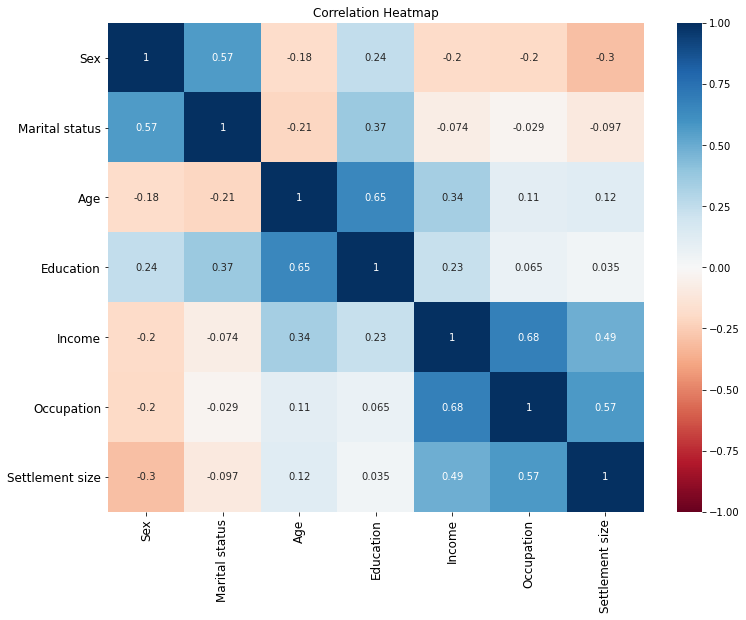

In [8]:
plt.figure(figsize = (12, 9))
s = sns.heatmap(customer.corr(),
               annot = True, 
               cmap = 'RdBu',
               vmin = -1, 
               vmax = 1)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
plt.title('Correlation Heatmap')
plt.show()

In [9]:
#standardization of the data 
st = StandardScaler()
customer_std = pd.DataFrame(st.fit_transform(customer), columns = list(customer.columns))
customer_std.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,-0.917399,-0.993024,2.653614,1.604323,0.097524,0.296823,1.552326
1,1.090038,1.007025,-1.187132,-0.063372,0.782654,0.296823,1.552326
2,-0.917399,-0.993024,1.117316,-0.063372,-0.833202,-1.269525,-0.909730
3,-0.917399,-0.993024,0.775916,-0.063372,1.328386,0.296823,0.321298
4,-0.917399,-0.993024,1.458716,-0.063372,0.736932,0.296823,0.321298


In [10]:
customer_std.agg(['mean', 'std'])

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
mean,3.554712e-15,5.950795e-16,1.180722e-16,-6.833423e-16,6.605827e-17,2.589706e-15,-4.455103e-15
std,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00


In [11]:
customer_std.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03
mean,3.554712e-15,5.950795e-16,1.180722e-16,-6.833423e-16,6.605827e-17,2.589706e-15,-4.455103e-15
std,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00
min,-9.173988e-01,-9.930243e-01,-1.528532e+00,-1.731068e+00,-2.234225e+00,-1.269525e+00,-9.097295e-01
25%,-9.173988e-01,-9.930243e-01,-7.603825e-01,-6.337243e-02,-6.113281e-01,-1.269525e+00,-9.097295e-01
50%,-9.173988e-01,-9.930243e-01,-2.482829e-01,-6.337243e-02,-1.418903e-01,2.968230e-01,3.212982e-01
75%,1.090038e+00,1.007025e+00,5.198664e-01,-6.337243e-02,4.492952e-01,2.968230e-01,3.212982e-01
max,1.090038e+00,1.007025e+00,3.421764e+00,3.272018e+00,4.945225e+00,1.863171e+00,1.552326e+00


In [12]:
#applying PCA
pca = PCA()

In [13]:
pca.fit(customer_std)

PCA()

In [14]:
var = np.round(pca.explained_variance_ratio_, 3)
var

array([0.357, 0.263, 0.188, 0.076, 0.057, 0.04 , 0.02 ])

Text(0, 0.5, 'Cumulative Explained Variance')

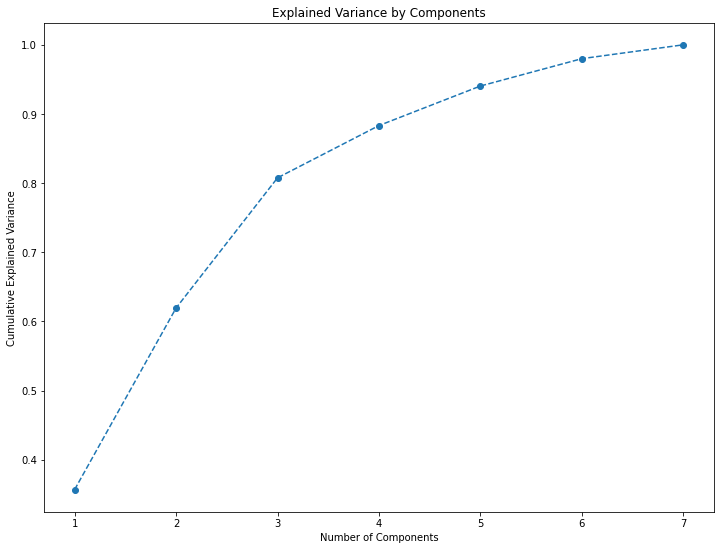

In [15]:
plt.figure(figsize = (12,9))
plt.plot(range(1,8), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [16]:
cusu_var = np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4)*100)
cusu_var

array([ 35.7 ,  61.95,  80.77,  88.33,  94.05,  98.  , 100.  ])

In [17]:
#choosing the number of prinicpal componets to be taken into account based on graph and cumsum
pca = PCA(n_components = 3)

In [18]:
pca.fit(customer_std)

PCA(n_components=3)

In [19]:
pca.explained_variance_ratio_

array([0.35696328, 0.26250923, 0.18821114])

In [20]:
#considering the loadings
pca.components_

array([[-0.31469524, -0.19170439,  0.32609979,  0.15684089,  0.52452463,
         0.49205868,  0.46478852],
       [ 0.45800608,  0.51263492,  0.31220793,  0.63980683,  0.12468314,
         0.01465779, -0.06963165],
       [-0.29301261, -0.44197739,  0.60954372,  0.27560461, -0.16566231,
        -0.39550539, -0.29568503]])

In [21]:
df_pca_comp = pd.DataFrame(data = pca.components_,
                           columns = customer.columns.values,
                           index = ['Component 1', 'Component 2', 'Component 3'])
df_pca_comp

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Component 1,-0.314695,-0.191704,0.326100,0.156841,0.524525,0.492059,0.464789
Component 2,0.458006,0.512635,0.312208,0.639807,0.124683,0.014658,-0.069632
Component 3,-0.293013,-0.441977,0.609544,0.275605,-0.165662,-0.395505,-0.295685


([<matplotlib.axis.YTick at 0xbc3ab80>,
 [Text(0, 0, 'Component 1'),
  Text(0, 1, 'Component 2'),
  Text(0, 2, 'Component 3')])

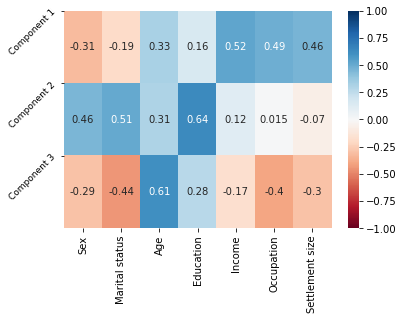

In [22]:
sns.heatmap(df_pca_comp,
            vmin = -1, 
            vmax = 1,
            cmap = 'RdBu',
            annot = True)
plt.yticks([0, 1, 2], 
           ['Component 1', 'Component 2', 'Component 3'],
           rotation = 45,
           fontsize = 9)

In [23]:
pca.transform(customer_std)

array([[ 2.51474593,  0.83412239,  2.1748059 ],
       [ 0.34493528,  0.59814564, -2.21160279],
       [-0.65106267, -0.68009318,  2.2804186 ],
       ...,
       [-1.45229829, -2.23593665,  0.89657125],
       [-2.24145254,  0.62710847, -0.53045631],
       [-1.86688505, -2.45467234,  0.66262172]])

In [24]:
scores_pca = pca.transform(customer_std)
scores_pca

array([[ 2.51474593,  0.83412239,  2.1748059 ],
       [ 0.34493528,  0.59814564, -2.21160279],
       [-0.65106267, -0.68009318,  2.2804186 ],
       ...,
       [-1.45229829, -2.23593665,  0.89657125],
       [-2.24145254,  0.62710847, -0.53045631],
       [-1.86688505, -2.45467234,  0.66262172]])

In [25]:
scores_pca_df = pd.DataFrame(pca.transform(customer_std))
scores_pca_df

,0,1,2
0,2.514746,0.834122,2.174806
1,0.344935,0.598146,-2.211603
2,-0.651063,-0.680093,2.280419
3,1.714316,-0.579927,0.730731
4,1.626745,-0.440496,1.244909
...,...,...,...
1995,-0.866034,0.298330,1.438958
1996,-1.114957,0.794727,-1.079871
1997,-1.452298,-2.235937,0.896571
1998,-2.241453,0.627108,-0.530456


<AxesSubplot:>

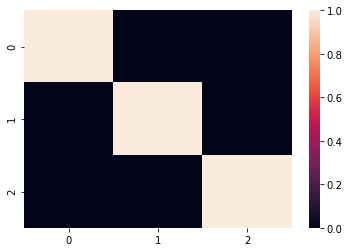

In [26]:
#confirming orthogonality
sns.heatmap(scores_pca_df.corr())

In [27]:
# fitting K-Means using the transformed data from PCA
wcss = []
for i in range(1,11):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

C:\Users\KASH\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\KASH\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\KASH\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\KASH\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\KASH\anaconda3\lib\site-packages\sklearn\cluster\_k

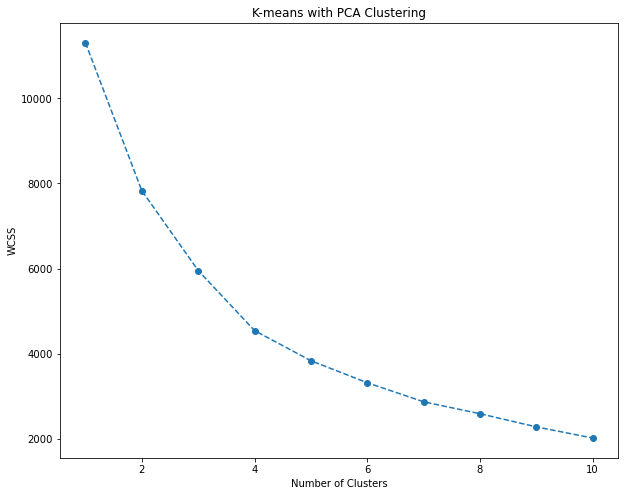

In [28]:
#plotting wcss to determine the number of clusters
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA Clustering')
plt.show()

In [29]:
kmeans_pca = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)

In [30]:
kmeans_pca

KMeans(n_clusters=4, random_state=42)

In [31]:
# fitting our data with the K-Means PCA model
kmeans_pca.fit(scores_pca)

C:\Users\KASH\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [32]:
#combining the original dataframe with principal components dataframe and assigned clusters
df_segm_pca_km = pd.concat([customer.reset_index(drop = True),scores_pca_df], axis = 1)

In [33]:
df_segm_pca_km

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,0,1,2
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909
...,...,...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,-0.866034,0.298330,1.438958
1996,1,1,27,1,117744,1,0,-1.114957,0.794727,-1.079871
1997,0,0,31,0,86400,0,0,-1.452298,-2.235937,0.896571
1998,1,1,24,1,97968,0,0,-2.241453,0.627108,-0.530456


In [34]:
#renaming the component columns
df_segm_pca_km.columns.values[-3: ] = ['Component 1', 'Component 2', 'Component 3']
df_segm_pca_km.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909


In [35]:
#adding columns with K-Means clustering labels
df_segm_pca_km['K-Means PCA Segm'] = kmeans_pca.labels_
df_segm_pca_km

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,K-Means PCA Segm
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,3
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,0
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,2
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,1
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,1
...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,-0.866034,0.298330,1.438958,2
1996,1,1,27,1,117744,1,0,-1.114957,0.794727,-1.079871,0
1997,0,0,31,0,86400,0,0,-1.452298,-2.235937,0.896571,2
1998,1,1,24,1,97968,0,0,-2.241453,0.627108,-0.530456,0


In [36]:
# calculating the means by segments for obtaining group names
df_segm_pca_km_freq = df_segm_pca_km.groupby(['K-Means PCA Segm']).mean()
df_segm_pca_km_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3
K-Means PCA Segm,,,,,,,,,,
0,0.900289,0.965318,28.878613,1.060694,107551.500000,0.677746,0.440751,-1.107019,0.703776,-0.781410
1,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046
2,0.306522,0.095652,35.313043,0.760870,93692.567391,0.252174,0.039130,-1.046406,-0.902963,1.003644
3,0.505660,0.690566,55.679245,2.128302,158019.101887,1.120755,1.101887,1.687328,2.031200,0.844039


In [37]:
df_segm_pca_km_freq['N Obs'] = df_segm_pca_km[['K-Means PCA Segm','Age']].groupby(['K-Means PCA Segm']).count()
df_segm_pca_km_freq.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,N Obs
K-Means PCA Segm,,,,,,,,,,,
0,0.900289,0.965318,28.878613,1.060694,107551.500000,0.677746,0.440751,-1.107019,0.703776,-0.781410,692
1,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046,583
2,0.306522,0.095652,35.313043,0.760870,93692.567391,0.252174,0.039130,-1.046406,-0.902963,1.003644,460
3,0.505660,0.690566,55.679245,2.128302,158019.101887,1.120755,1.101887,1.687328,2.031200,0.844039,265


In [38]:
df_segm_pca_km_freq['Prop Obs'] = df_segm_pca_km_freq['N Obs'] / df_segm_pca_km_freq['N Obs'].sum()
df_segm_pca_km_freq = df_segm_pca_km_freq.rename({0:'standard', 
                                                          1:'career focused',
                                                          2:'fewer opportunities', 
                                                          3:'well-off'})
df_segm_pca_km_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,N Obs,Prop Obs
K-Means PCA Segm,,,,,,,,,,,,
standard,0.900289,0.965318,28.878613,1.060694,107551.500000,0.677746,0.440751,-1.107019,0.703776,-0.781410,692,0.3460
career focused,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046,583,0.2915
fewer opportunities,0.306522,0.095652,35.313043,0.760870,93692.567391,0.252174,0.039130,-1.046406,-0.902963,1.003644,460,0.2300
well-off,0.505660,0.690566,55.679245,2.128302,158019.101887,1.120755,1.101887,1.687328,2.031200,0.844039,265,0.1325


In [40]:
df_segm_pca_km['Legend'] = df_segm_pca_km['K-Means PCA Segm'].map({0:'standard', 
                                                          1:'career focused',
                                                          2:'fewer opportunities', 
                                                          3:'well-off'})
df_segm_pca_km

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,K-Means PCA Segm,Legend
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,3,well-off
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,0,standard
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,2,fewer opportunities
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,1,career focused
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,1,career focused
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,-0.866034,0.298330,1.438958,2,fewer opportunities
1996,1,1,27,1,117744,1,0,-1.114957,0.794727,-1.079871,0,standard
1997,0,0,31,0,86400,0,0,-1.452298,-2.235937,0.896571,2,fewer opportunities
1998,1,1,24,1,97968,0,0,-2.241453,0.627108,-0.530456,0,standard
